In [44]:
#| default_exp squaring
from nbdev.showdoc import *
import numpy as np
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import diffusion_curvature
from diffusion_curvature.core import plot_3d, diffusion_matrix, gaussian_kernel
def plot_diffusion_as_3d(points,signal, title = ""):
    combined_points = np.hstack([points,signal[:,None]])
    plot_3d(combined_points,signal,lim=1, title=title)
# Reload any changes made to external files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Curvature by Squaring

In [45]:
from diffusion_curvature.datasets import sphere, hyperboloid, plane, paraboloid

In [47]:
from pyemd import emd
def compare_to_sqrt(X,t, D = None, compute_emd = False, idx = 0, power = 2):
    P = diffusion_matrix(X,kernel_type="adaptive",anisotropic_density_normalization=1)
    Pt = np.linalg.matrix_power(P,t)
    Pt2 = np.linalg.matrix_power(P,t*power)
    Pt_sqrt = Pt[0]**(1/power)
    print("sum of sqrt",np.sum(Pt_sqrt))
    Pt_sqrt /= np.sum(Pt_sqrt)
    plot_diffusion_as_3d(X, Pt2[0], title = "$P^{2t}$")
    plot_diffusion_as_3d(X, Pt_sqrt, title = "$(P^{t})$ square root")
    if compute_emd:
        d = emd(Pt2[0], Pt_sqrt, D)
        print(f"Distance {d} between distributions")

sum of sqrt 118.8906559303174


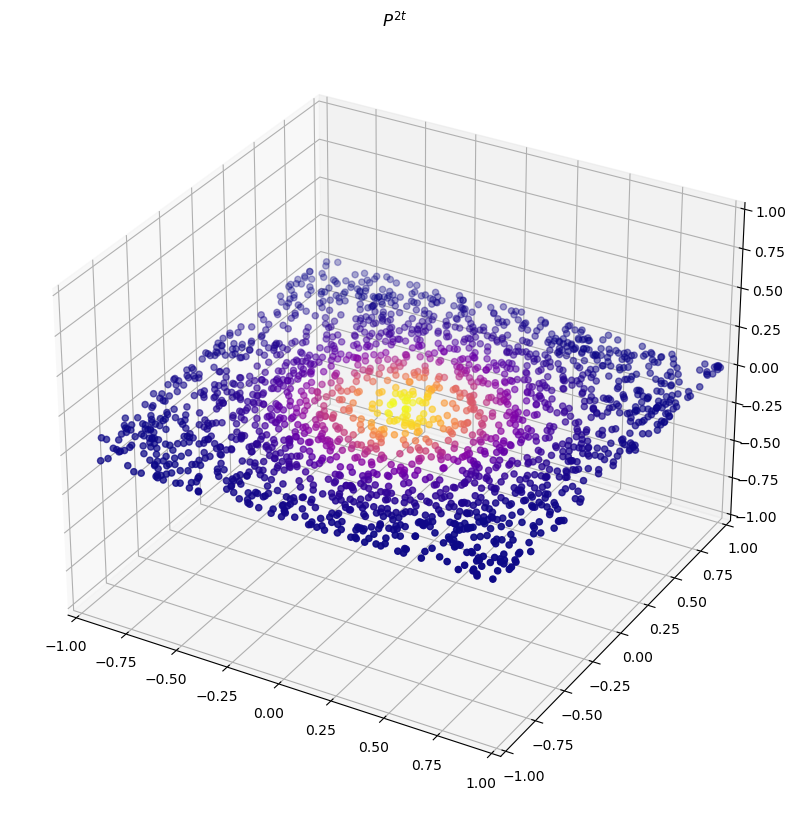

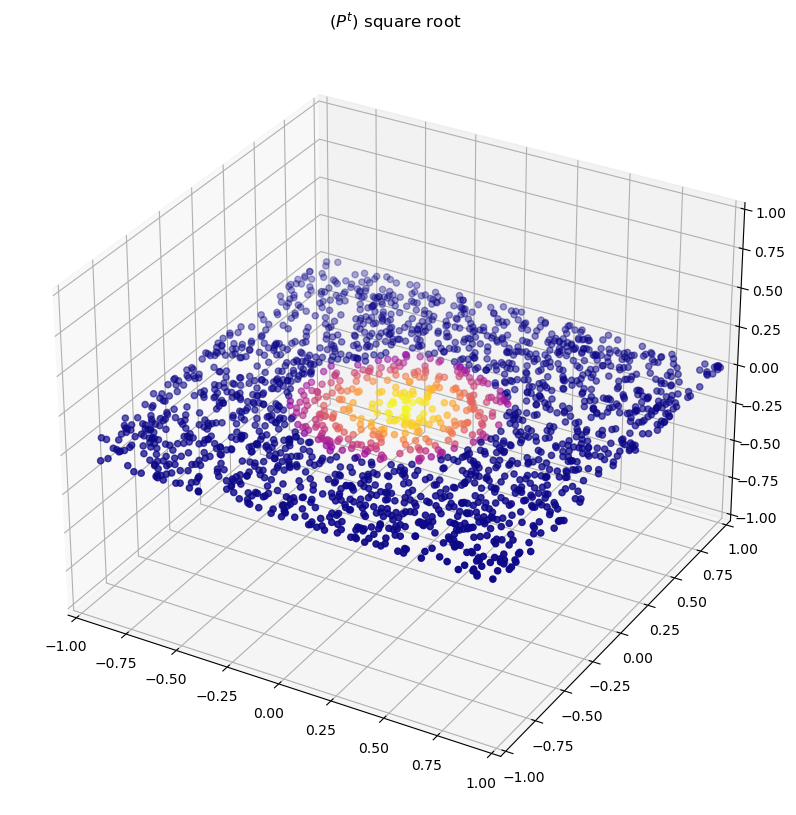

In [56]:
from sklearn.metrics import pairwise_distances
X = plane(2000)
# because this is euclidean space
D = pairwise_distances(X,X)
compare_to_sqrt(X,2, power=8)

## Repeating with the sphere

sum of sqrt 140.66110485641713


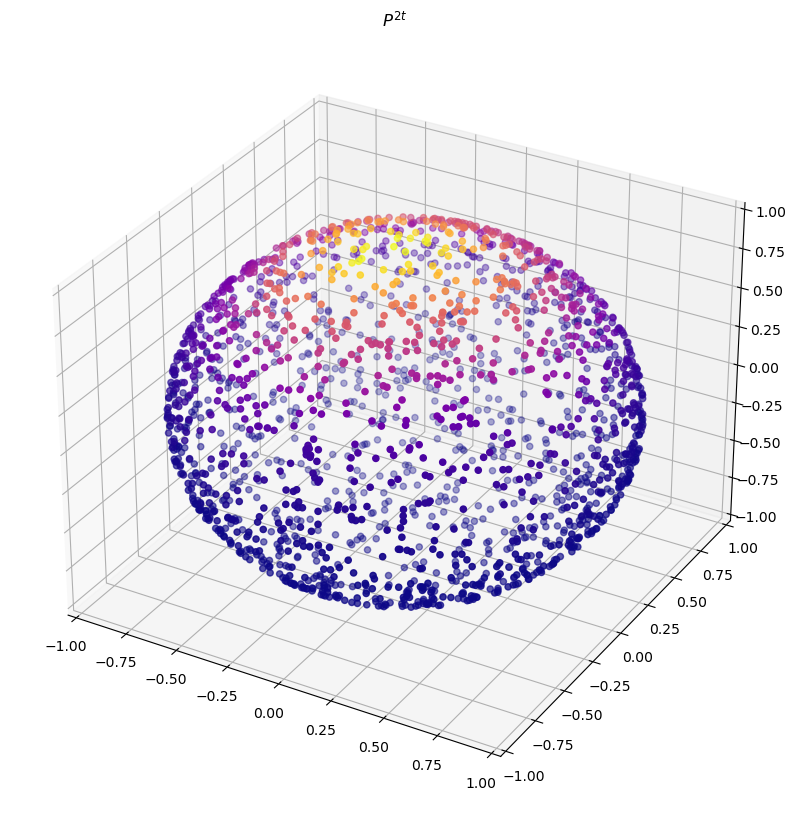

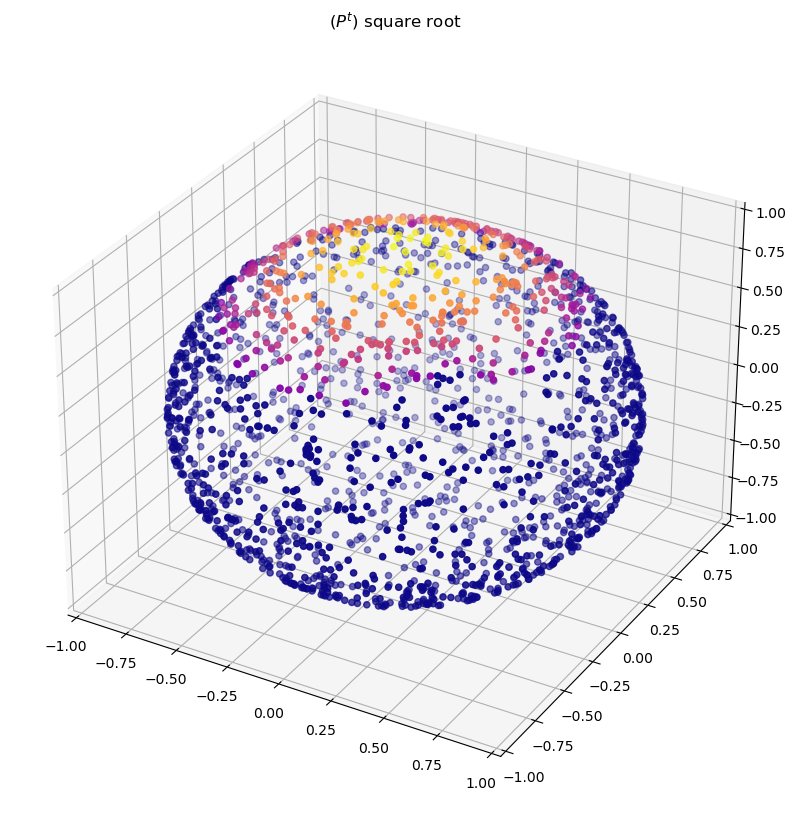

In [54]:
X, ks = sphere(2000,use_guide_points=True)
compare_to_sqrt(X,t=2,compute_emd=False,power=8)

## The saddle

In [51]:
X, ks = paraboloid(2000, use_guide_points=True)

sum of sqrt 111.88598008363317


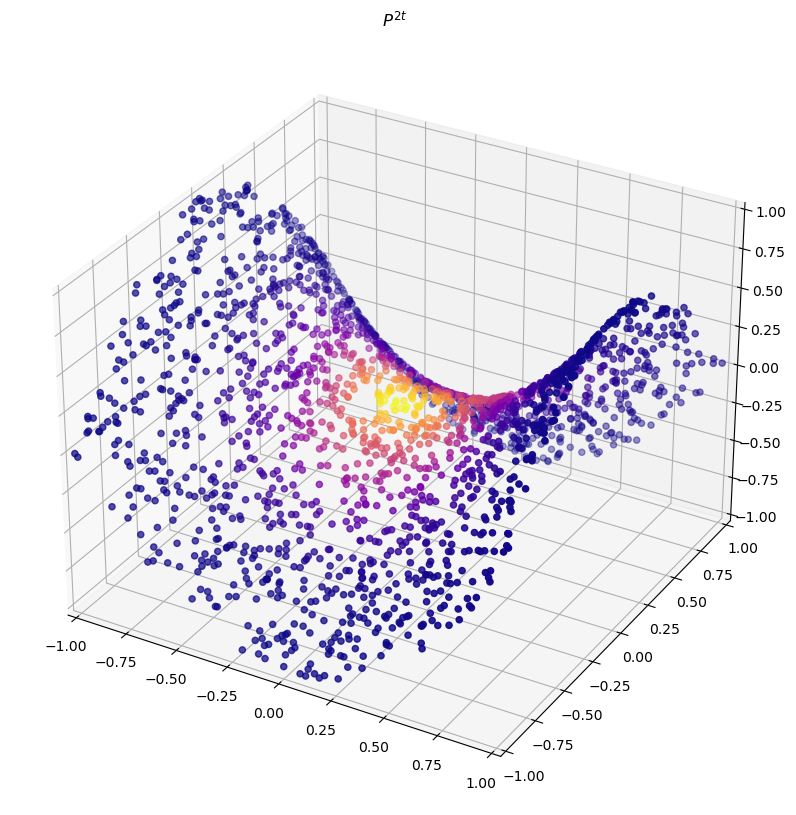

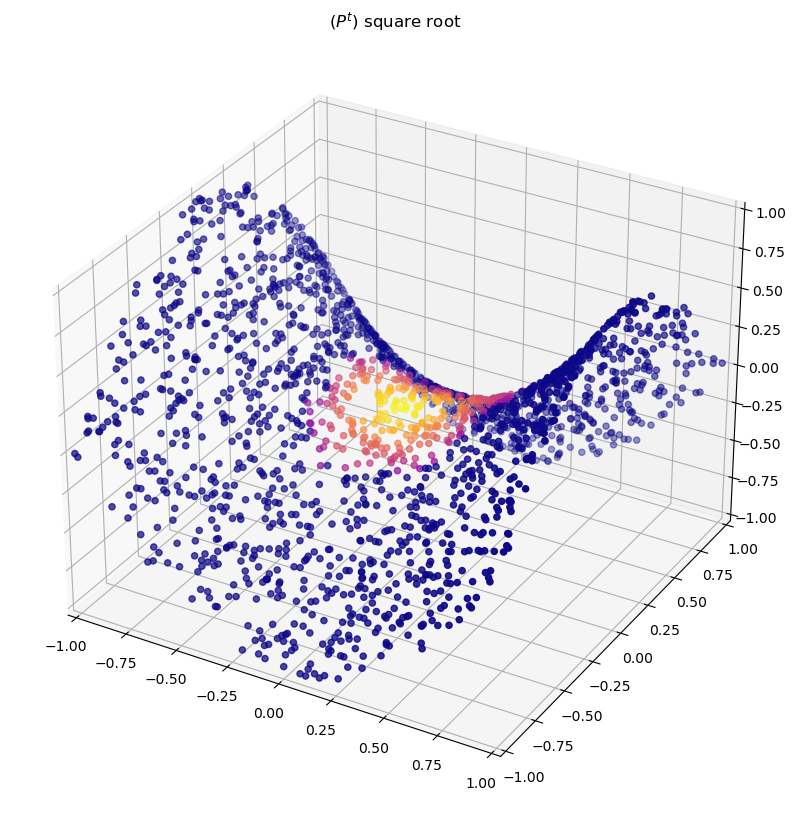

In [53]:
compare_to_sqrt(X,t=2,compute_emd=False,power=8)